In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [4]:
train = pd.read_csv('train_transformed.csv')
train.head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Gender_Male,...,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,19,10049,1,22,2,17,372,5,872,0,...,0,1,0,1,0,0,0,1,0,1
1,39,31678,3,15,1,12,694,2,872,0,...,1,0,0,0,1,1,0,0,0,1
2,23,25602,3,47,1,14,595,3,567,1,...,0,1,1,0,1,0,0,1,0,1
3,21,23911,2,10,1,0,367,1,765,1,...,0,0,0,1,1,0,0,0,0,0
4,21,39651,1,20,0,8,598,4,872,1,...,0,1,0,1,1,0,0,1,0,1


In [5]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']
cat_cols = [col for col in train.columns if col not in numeric_cols + ['Premium Amount']]



scaled_train = pd.DataFrame(StandardScaler().fit_transform(train[numeric_cols]),
                            columns=numeric_cols)

binery_cols = train[cat_cols]
scaled_train = pd.concat([scaled_train,binery_cols.reset_index(drop = True)],axis = 1)
scaled_train.head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,-1.648301,-0.790629,-0.746862,-0.251523,1.226378,1.286338,-1.567375,-0.007023,0,1,...,0,1,0,1,0,0,0,1,0,1
1,-0.159542,0.718985,0.733500,-0.843258,-0.000333,0.420713,0.714630,-1.163391,0,0,...,1,0,0,0,1,1,0,0,0,1
2,-1.350549,0.294906,0.733500,1.861820,-0.000333,0.766963,0.013020,-0.777935,1,0,...,0,1,1,0,1,0,0,1,0,1
3,-1.499425,0.176881,-0.006681,-1.265927,-0.000333,-1.656788,-1.602810,-1.548847,1,1,...,0,0,0,1,1,0,0,0,0,0
4,-1.499425,1.275467,-0.746862,-0.420590,-1.227044,-0.271787,0.034281,-0.392479,1,0,...,0,1,0,1,1,0,0,1,0,1


In [10]:
scaled_train.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Gender_Male', 'Marital Status_Married', 'Marital Status_Single',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD', 'Occupation_Self-Employed',
       'Occupation_Unemployed', 'Location_Suburban', 'Location_Urban',
       'Policy Type_Comprehensive', 'Policy Type_Premium',
       'Customer Feedback_Good', 'Customer Feedback_Poor',
       'Smoking Status_Yes', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Property Type_Condo', 'Property Type_House'],
      dtype='object')

In [6]:
scaled_train['Premium Amount'] = train['Premium Amount'].reset_index(drop = True)
scaled_train.head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,Premium Amount
0,-1.648301,-0.790629,-0.746862,-0.251523,1.226378,1.286338,-1.567375,-0.007023,0,1,...,1,0,1,0,0,0,1,0,1,872
1,-0.159542,0.718985,0.733500,-0.843258,-0.000333,0.420713,0.714630,-1.163391,0,0,...,0,0,0,1,1,0,0,0,1,872
2,-1.350549,0.294906,0.733500,1.861820,-0.000333,0.766963,0.013020,-0.777935,1,0,...,1,1,0,1,0,0,1,0,1,567
3,-1.499425,0.176881,-0.006681,-1.265927,-0.000333,-1.656788,-1.602810,-1.548847,1,1,...,0,0,1,1,0,0,0,0,0,765
4,-1.499425,1.275467,-0.746862,-0.420590,-1.227044,-0.271787,0.034281,-0.392479,1,0,...,1,0,1,1,0,0,1,0,1,872


In [7]:
x = scaled_train.drop('Premium Amount',axis=1,inplace = False)
y = scaled_train['Premium Amount']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

# Normalize target variable
y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

# Normalize input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to torch tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train).view(-1, 1)  # Reshape target
y_test = torch.FloatTensor(y_test).view(-1, 1)


In [15]:
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(10, 1)
        self.relu = nn.ReLU()  # Define ReLU only once

    def forward(self, X):
        X = self.relu(self.fc1(X))  # Pass through first layer + activation
        X = self.relu(self.fc2(X))  # Pass through second layer + activation
        X = self.relu(self.fc3(X))  # Pass through third layer + activation
        X = self.fc4(X)  # Final layer (output doesn't use activation)
        return X


In [16]:
input_size = x_train.shape[1]
print(input_size)
model = RegressionModel(input_size)
print(model)

28
RegressionModel(
  (fc1): Linear(in_features=28, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [17]:
# loss function and optimizer
lossf  = nn.MSELoss()

# Set a smaller learning rate and gradient clipping
optimizer = optim.SGD(model.parameters(), lr=0.0001)

num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = lossf(outputs, y_train.view(-1, 1))

    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Clip gradients to avoid exploding gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    # Perform the optimization step
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.0200
Epoch [20/100], Loss: 1.0199
Epoch [30/100], Loss: 1.0198
Epoch [40/100], Loss: 1.0197
Epoch [50/100], Loss: 1.0196
Epoch [60/100], Loss: 1.0195
Epoch [70/100], Loss: 1.0194
Epoch [80/100], Loss: 1.0193
Epoch [90/100], Loss: 1.0192
Epoch [100/100], Loss: 1.0191


In [18]:
# Predict using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Avoid computing gradients during inference
    predictions = model(x_test)

print(predictions)  # Predicted values


tensor([[-0.1527],
        [-0.1146],
        [-0.1347],
        ...,
        [-0.1362],
        [-0.1440],
        [-0.1236]])


In [19]:
# Convert predictions and actual y_test back to NumPy for easy computation
predictions = predictions.numpy().flatten()
actuals = y_test.numpy().flatten()

# Print comparison
for i in range(10):  # Print first 10 predictions vs actual values
    print(f"Prediction: {predictions[i]:.2f}, Actual: {actuals[i]:.2f}")


Prediction: -0.15, Actual: 0.45
Prediction: -0.11, Actual: 1.86
Prediction: -0.13, Actual: 0.45
Prediction: -0.13, Actual: -0.11
Prediction: -0.11, Actual: 0.45
Prediction: -0.14, Actual: 0.45
Prediction: -0.13, Actual: 1.47
Prediction: -0.11, Actual: -2.02
Prediction: -0.12, Actual: 0.45
Prediction: -0.11, Actual: 0.45


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1.0187616348266602
R^2 Score: -0.019219040870666504


In [21]:
# Revert normalization if you scaled the target variable earlier
predictions_original_scale = predictions * y_std + y_mean
y_test_original_scale = y_test.numpy().flatten() * y_std + y_mean


TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

In [24]:
# Revert normalization if you scaled the target variable earlier
predictions_original_scale = predictions * y_std.item() + y_mean.item()  # Convert y_std and y_mean to Python scalars
y_test_original_scale = y_test.numpy().flatten() * y_std.item() + y_mean.item()  # Convert y_std and y_mean to Python scalars
print(predictions_original_scale)
# print(y_test_original_scale)

[668.6218  681.45636 674.67065 ... 674.1889  671.5595  678.4061 ]


In [25]:
torch.save(model.state_dict(),'regression_model.pth')

In [27]:
loaded_model = RegressionModel(input_size)
loaded_model.load_state_dict(torch.load('regression_model.pth'))

<ipython-input-27-0b06114f4019>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('regression_model.pth'))


<All keys matched successfully>

In [28]:
test = pd.read_csv('test_transformed.csv')
test.head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,31,23981,2,13,1,14,372,8,0,1,...,0,1,1,0,1,0,1,0,0,0
1,47,17092,0,24,1,16,819,9,0,0,...,1,0,0,0,1,1,0,0,1,0
2,28,30424,3,5,1,3,770,5,0,0,...,1,0,0,1,1,0,0,0,0,1
3,24,10863,2,11,1,14,755,7,1,0,...,0,1,0,0,0,0,0,1,0,1
4,43,52370,2,5,1,15,432,2,1,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']
cat_cols = [col for col in test.columns if col not in numeric_cols]



scaled_test = pd.DataFrame(StandardScaler().fit_transform(test[numeric_cols]),
                            columns=numeric_cols)

binery_cols = test[cat_cols]
scaled_test = pd.concat([scaled_test,binery_cols.reset_index(drop = True)],axis = 1)
scaled_test.head()

In [ ]:
# Redefine the model architecture
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(10, 1)

    def forward(self, X):
        X = self.fc1(X)
        X = self.relu(X)
        X = self.fc2(X)
        X = self.relu(X)
        X = self.fc3(X)
        X = self.relu(X)
        X = self.fc4(X)
        return X


# Input size
input_size = test.shape[1]  # Adjust this to the number of features in your test set

# Load the trained model
model = RegressionModel(input_size)
model.load_state_dict(torch.load('regression_model.pth'))
model.eval()  # Switch model to evaluation mode

# Preprocess the test data
numeric_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
                'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

# Combine scaled numeric features with encoded binary categorical features

scaler = StandardScaler()
scaled_num_features = scaler.fit_transform(test[numeric_cols])

scaled_combined_features = pd.concat([pd.DataFrame(scaled_numeric_features), binary_categorical_features.reset_index(drop=True)], axis=1)

# Convert the test features into torch tensors
x_test_tensor = torch.FloatTensor(scaled_test_features)

# Predict
with torch.no_grad():  # No need to compute gradients during prediction
    predictions = model(x_test_tensor).detach().numpy().flatten()

# View predictions
results = pd.DataFrame({'Predicted Premium Amount': predictions})
print(results.head())


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('train.csv')
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


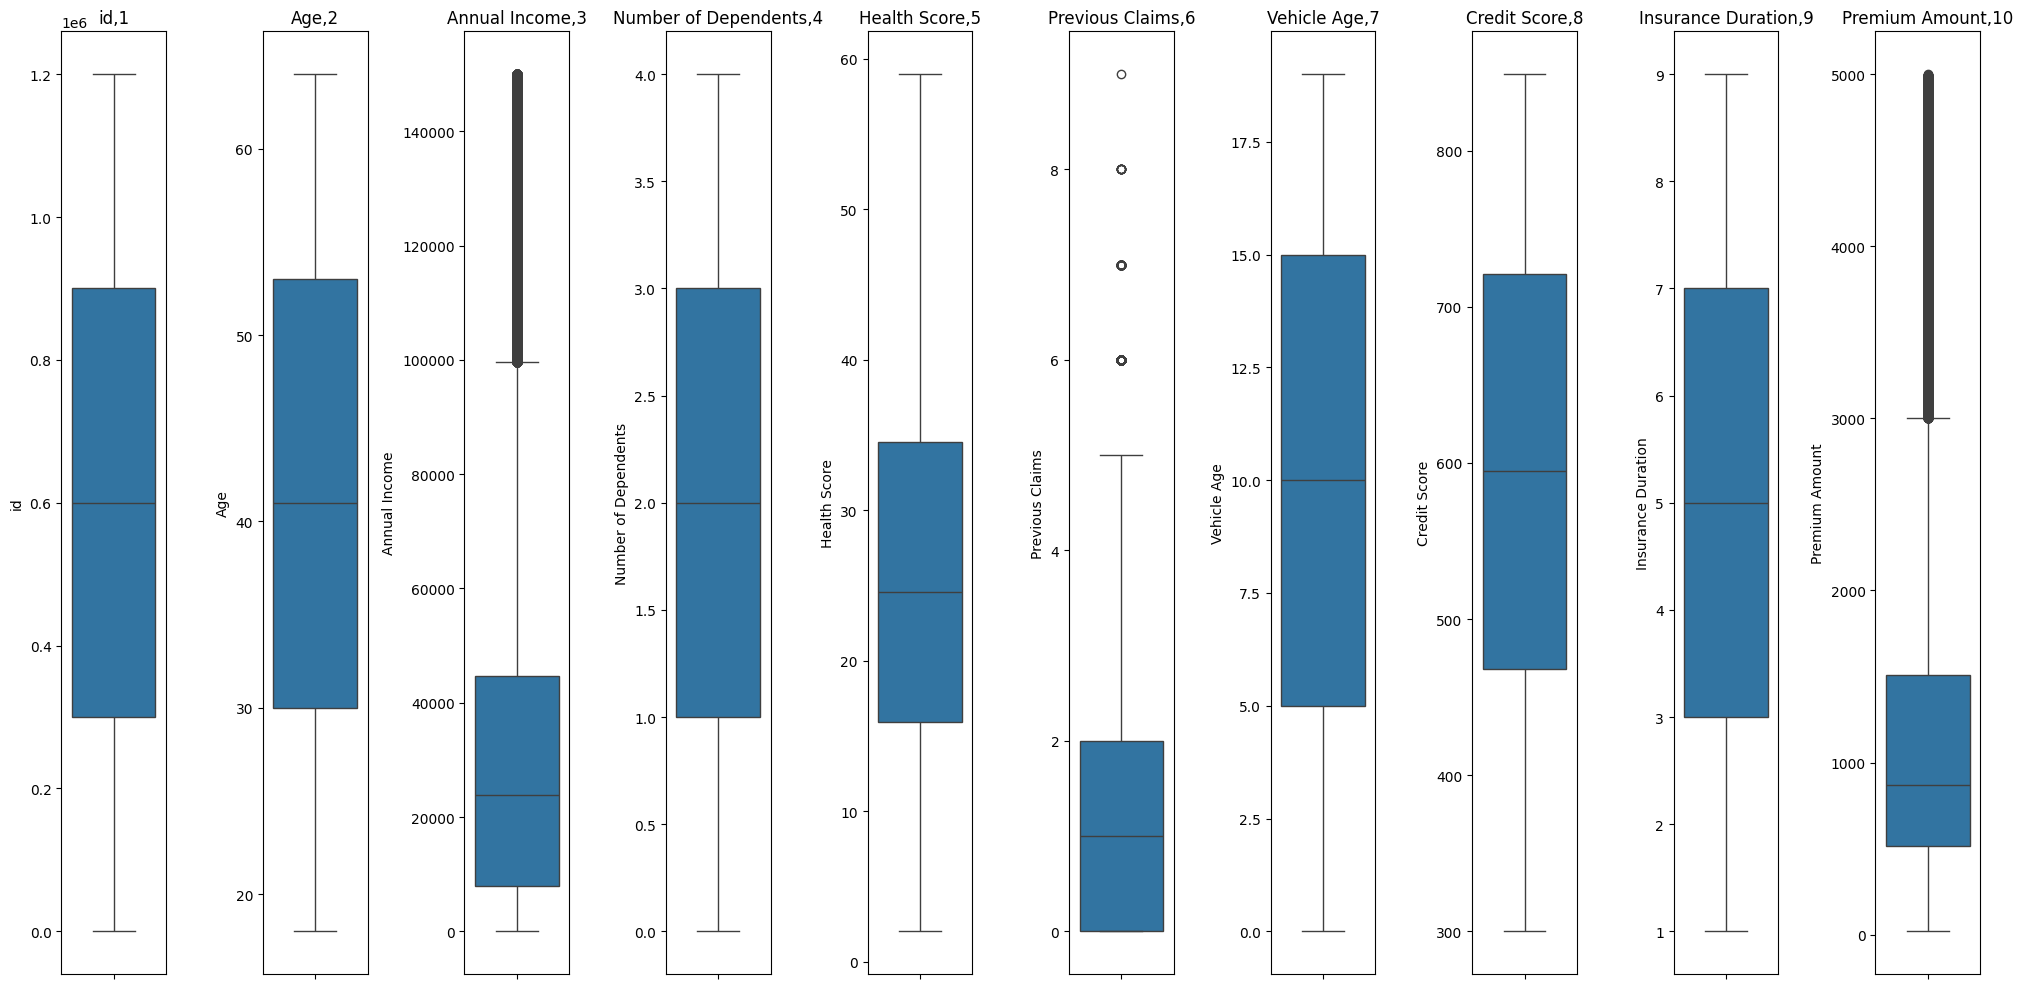

In [10]:
plt.figure(figsize = (20,10))
numeric_cols = df.select_dtypes(include = 'number').columns
for i ,col in enumerate(numeric_cols,1):
    plt.subplot(1,len(numeric_cols),i)
    sns.boxplot(df,y = col)
    plt.title(f'{col},{i}')
plt.tight_layout()
plt.show()

In [11]:
# function to handel outliers with median
import numpy as np
def handle_outliers_with_median(df,numeric_cols):
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
                                #condition                                      if true     if false
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),df[col].median(),df[col])

In [14]:
t = 0
while t < 10:
    handle_outliers_with_median(df,numeric_cols)
    t += 1

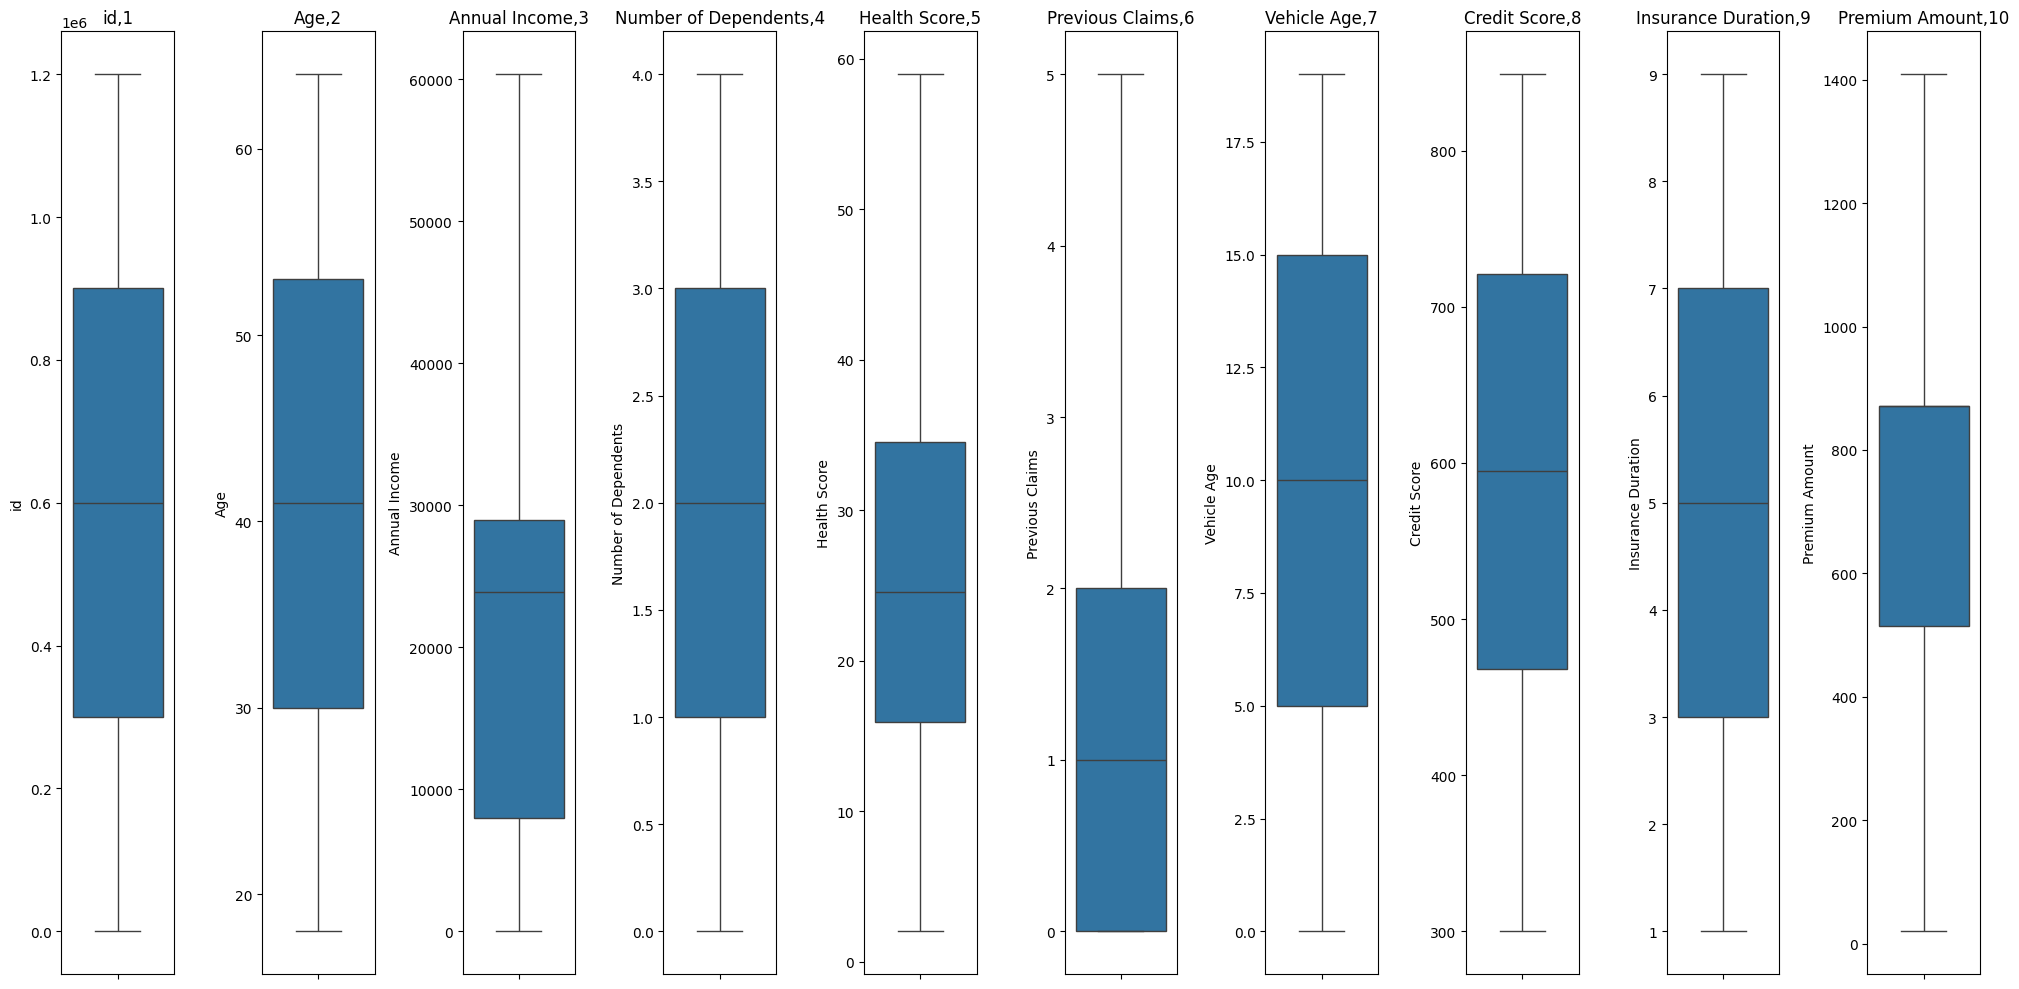

In [15]:
plt.figure(figsize = (20,10))
numeric_cols = df.select_dtypes(include = 'number').columns
for i ,col in enumerate(numeric_cols,1):
    plt.subplot(1,len(numeric_cols),i)
    sns.boxplot(df,y = col)
    plt.title(f'{col},{i}')
plt.tight_layout()
plt.show()

In [16]:
df.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  float64
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [20]:
df.drop('id',axis = 1,inplace = True)

In [21]:
# function to fill nulls with median in numeric and farward fill in categorical
def fill_nulls(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            median_value = df[col].median()
            df[col].fillna(median_value,inplace = True)
            print(f'{col} filled with median{median_value}.')
            print('--------------------------')
        elif pd.api.types.is_object_dtype(df[col]):
            df[col].fillna(method = 'ffill',inplace = True)
            print(f'{col} filled with forward fill.')
            print('===========================')

In [22]:
# funcion for handle null valuse
fill_nulls(df)
df.isnull().sum()

Age filled with median41.0.
--------------------------
Gender filled with forward fill.
Annual Income filled with median23911.0.
--------------------------
Marital Status filled with forward fill.
Number of Dependents filled with median2.0.
--------------------------
Education Level filled with forward fill.
Occupation filled with forward fill.
Health Score filled with median24.57864816412784.
--------------------------
Location filled with forward fill.
Policy Type filled with forward fill.
Previous Claims filled with median1.0.
--------------------------
Vehicle Age filled with median10.0.
--------------------------
Credit Score filled with median595.0.
--------------------------
Insurance Duration filled with median5.0.
--------------------------
Policy Start Date filled with forward fill.
Customer Feedback filled with forward fill.
Smoking Status filled with forward fill.
Exercise Frequency filled with forward fill.
Property Type filled with forward fill.
Premium Amount filled with

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [23]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,872.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Self-Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,872.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,595.0,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,23911.0,Married,2.0,Bachelor's,Self-Employed,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,872.0


In [24]:
from google.colab import files
df.to_csv('train_colab.csv')
files.download('train_colab.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>